<a href="https://colab.research.google.com/github/IshaqKHATTAK/Natural-Language-Processing/blob/main/sentiment_analysis_suing_RNN_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
from google.colab import files
video = files.upload()

Saving kaggle.json to kaggle.json


In [2]:
!mkdir -p ~/.kaggle

In [3]:
!cp kaggle.json ~/.kaggle

In [4]:
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
!kaggle datasets download mohdazfar/pakistan-elections-2018

 90% 19.0M/21.1M [00:01<00:00, 23.2MB/s]
100% 21.1M/21.1M [00:01<00:00, 17.5MB/s]


In [6]:
!unzip /content/pakistan-elections-2018.zip

Archive:  /content/pakistan-elections-2018.zip
  inflating: cleaned_twitter_elections_data.json  


In [7]:
import json
with open('/content/cleaned_twitter_elections_data.json','r') as jsonf:
    df_json = json.load(jsonf)

In [8]:
df_json[0]['text']

'Vote for @MJibranNasir #PakistanElections2018 #voiceofreason #aamaadmi https://t.co/oeBPxNzAuU'

In [9]:
text = []
for i in range(len(df_json)):
    text.append(df_json[i]['text'])

In [10]:
import pandas as pd



# Create DataFrame from list
df = pd.DataFrame(text, columns=['text'])

# Display the DataFrame
print(df)

                                                    text
0      Vote for @MJibranNasir #PakistanElections2018 ...
1      Kids born in the year 2000 will be voting this...
2      Maryam Nawaz Last Message to PMLN Supporters |...
3      RT @hizbuttahrir: What is ‘Real Change’?\n \nT...
4      #Daesh- Head of states of countries who don't ...
...                                                  ...
29574  RT @mrazaharoon: #PSP manifesto guarantees dev...
29575  #PSP Candidate for #PS96 Korangi, Syed Faizan ...
29576  RT @PMLNPunjabPk: Charged crowd of PMLN Worker...
29577  RT @mrazaharoon: Vote for Saddam Hussain Rind ...
29578  RT @PMLNPunjabPk: Charged crowd of PMLN Worker...

[29579 rows x 1 columns]


In [11]:
df.head(3)

,text
0,Vote for @MJibranNasir #PakistanElections2018 ...
1,Kids born in the year 2000 will be voting this...
2,Maryam Nawaz Last Message to PMLN Supporters |...


In [12]:
df['text'][0]

'Vote for @MJibranNasir #PakistanElections2018 #voiceofreason #aamaadmi https://t.co/oeBPxNzAuU'

In [14]:
!pip install emoji

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 356.6/356.6 kB 4.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for emoji: filename=emoji-2.6.0-py2.py3-none-any.whl size=351311 sha256=7dfb3b6521586f85eab0892ae473526fa61782975a99740bb65e331f7c349141
  Stored in directory: /root/.cache/pip/wheels/ea/0b/64/114bc939d0083621aa41521e21be246c888260b8aa21e6c1ad
Successfully built emoji


In [15]:
import re
import emoji
def to_lower(text):
    return text.lower()
def remove_punc(text):
    return re.sub(r'[^\w\s]','',text)
def remove_URL(text):
  text = re.sub(r'https?://\S+','',text)
  return text
def remove_special_characters(text):
    no_special_characters = re.sub(r'[^A-Za-z0-9 ]+', '', text)
    return no_special_characters
def replace_emji(text):
  text = emoji.demojize(text, delimiters=('', ''))
  return text

In [16]:
df['text'] = df['text'].apply(to_lower)
df['text'] = df['text'].apply(remove_URL)
df['text'] = df['text'].apply(remove_punc)
df['text'] = df['text'].apply(replace_emji)
df['text'] = df['text'].apply(remove_special_characters)

In [17]:
import nltk
from nltk.probability import FreqDist
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer, PorterStemmer
from nltk import pos_tag
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
sw = stopwords.words('english')
ps = PorterStemmer()
wl = WordNetLemmatizer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [18]:
def tokenize_stem_lemetize(text):
    tokens = word_tokenize(text)
    remove_sw = [word for word in tokens if word not in sw]
    lematize = [wl.lemmatize(word) for word in remove_sw]
    stemmed = [ps.stem(word )for word in lematize]

    return stemmed
df['text'] = df['text'].apply(tokenize_stem_lemetize)

#Sentiment analysis

In [19]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [20]:
sentiment_vader = []
def sentiment_vader(text):
  text = ' '.join(text)
  van = SentimentIntensityAnalyzer()
  sntment = van.polarity_scores(text)
  return max(sntment, key=sntment.get)
df['sentiment vader'] = df['text'].apply(sentiment_vader)
df.head(3)

,text,sentiment vader
0,"[vote, mjibrannasir, pakistanelections2018, vo...",neu
1,"[kid, born, year, 2000, vote, time, ill, let, ...",neu
2,"[maryam, nawaz, last, messag, pmln, support, e...",neu


In [21]:
df['sentiment vader'].value_counts()

neu         26309
compound     2979
neg           278
pos            13
Name: sentiment vader, dtype: int64

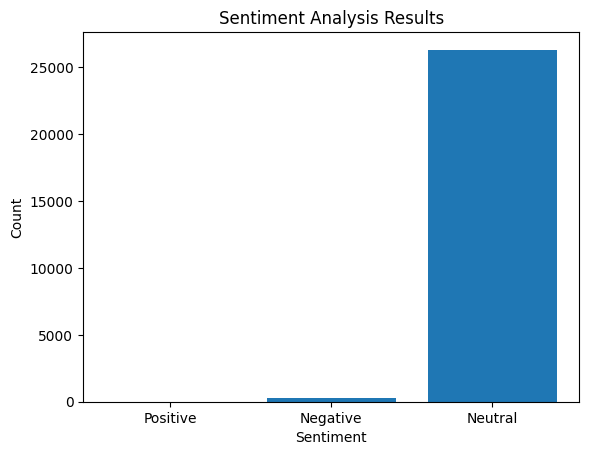

In [22]:
import matplotlib.pyplot as plt

# Sample sentiment analysis results
sentiments = ['Positive', 'Negative', 'Neutral']
counts = [13, 278, 26309]

# Plotting the bar chart
plt.bar(sentiments, counts)

# Adding labels and title
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Analysis Results')

# Displaying the plot
plt.show()


In [23]:
from textblob import TextBlob

sentiment_textblob = [] #positive --> 1 negtive-->2 netral --> 0

def sentiment_TexBlob(text):
  text = ' '.join(text)
  # Create a TextBlob object
  blob = TextBlob(text)
  # Perform sentiment analysis
  sentiment = blob.sentiment.polarity
  if sentiment == 0.0:
    sentiment_textblob.append(0)
  elif sentiment < 0:
    sentiment_textblob.append(2)
  else:
    sentiment_textblob.append(1)


df['text'].apply(sentiment_TexBlob)

0        None
1        None
2        None
3        None
4        None
         ... 
29574    None
29575    None
29576    None
29577    None
29578    None
Name: text, Length: 29579, dtype: object

In [24]:
df['sentiment textblob'] = sentiment_textblob
df.head(3)

,text,sentiment vader,sentiment textblob
0,"[vote, mjibrannasir, pakistanelections2018, vo...",neu,0
1,"[kid, born, year, 2000, vote, time, ill, let, ...",neu,2
2,"[maryam, nawaz, last, messag, pmln, support, e...",neu,1


In [25]:
df

,text,sentiment vader,sentiment textblob
0,"[vote, mjibrannasir, pakistanelections2018, vo...",neu,0
1,"[kid, born, year, 2000, vote, time, ill, let, ...",neu,2
2,"[maryam, nawaz, last, messag, pmln, support, e...",neu,1
3,"[rt, hizbuttahrir, real, chang, word, tabde, f...",neu,1
4,"[daesh, head, state, countri, dont, want, succ...",neu,1
...,...,...,...
29574,"[rt, mrazaharoon, psp, manifesto, guarante, de...",neu,0
29575,"[psp, candid, ps96, korangi, sy, faizan, yasir...",neu,1
29576,"[rt, pmlnpunjabpk, charg, crowd, pmln, worker,...",neu,0
29577,"[rt, mrazaharoon, vote, saddam, hussain, rind,...",neu,0


In [26]:
df['sentiment textblob'].value_counts()

0    16181
1    11044
2     2354
Name: sentiment textblob, dtype: int64

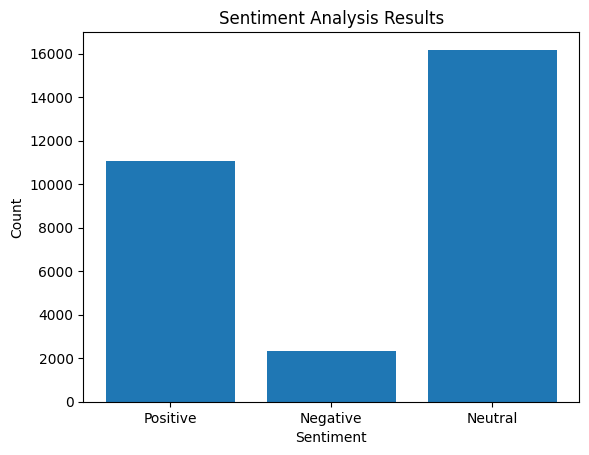

In [27]:
import matplotlib.pyplot as plt

# Sample sentiment analysis results
sentiments = ['Positive', 'Negative', 'Neutral']
counts = [11044, 2354, 16181]

# Plotting the bar chart
plt.bar(sentiments, counts)

# Adding labels and title
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Analysis Results')

# Displaying the plot
plt.show()


In [28]:
new_df = df.drop(['sentiment vader'], axis = 1)
new_df.head()

,text,sentiment textblob
0,"[vote, mjibrannasir, pakistanelections2018, vo...",0
1,"[kid, born, year, 2000, vote, time, ill, let, ...",2
2,"[maryam, nawaz, last, messag, pmln, support, e...",1
3,"[rt, hizbuttahrir, real, chang, word, tabde, f...",1
4,"[daesh, head, state, countri, dont, want, succ...",1


Embeddings

In [29]:
def token_to_sent(text):
  return ' '.join(text)


df['text'] = df['text'].apply(token_to_sent)

In [ ]:
# Step 1: Data Preprocessing
# Tokenize text data and create numerical representations (word embeddings)

# Step 2: Data Preparation
# Split the dataset into training and testing sets
# Convert text data into sequences of tokenized words
# Map sentiment labels to numerical values

# Step 3: Build and Train the RNN Model
# Design the RNN architecture with Embedding, RNN layers, and Dense layer
# Compile the model with appropriate loss and optimizer
# Train the model on the training data

# Step 4: Evaluate the Model
# Evaluate the model on the testing data
# Calculate metrics like accuracy, precision, recall, F1-score

# Step 5: Inference
# Use the trained model to predict sentiment labels for new data


In [30]:
df['text'][0]

'vote mjibrannasir pakistanelections2018 voiceofreason aamaadmi'

In [31]:
from keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(oov_token='<nothing>')

In [32]:
tokenizer.fit_on_texts(df['text'])

In [33]:
print(tokenizer.word_index)

{'<nothing>': 1, 'rt': 2, 'pakistan': 3, 'ge2018': 4, 'elect': 5, 'elections2018': 6, 'generalelections2018': 7, 'pti': 8, 'pmln': 9, 'amp': 10, 'khan': 11, 'today': 12, 'imrankhanpti': 13, 'wajskhan': 14, 'candid': 15, 'attack': 16, 'vote': 17, 'year': 18, 'win': 19, 'time': 20, 'parti': 21, 'pmlnorg': 22, 'support': 23, 'peopl': 24, 'polic': 25, 'last': 26, 'afraid': 27, 'ppp': 28, 'power': 29, 'cynthiadritchi': 30, 'two': 31, 'believ': 32, 'strong': 33, 'posit': 34, 'car': 35, 'mosqu': 36, 'polit': 37, 'stone': 38, 'noth': 39, 'pelt': 40, 'ayazsadiq122': 41, 'tear': 42, 'gass': 43, 'minaret': 44, 'trial': 45, 'campaign': 46, 'clariti': 47, 'woke': 48, 'worker': 49, 'maizahame': 50, 'day': 51, 'say': 52, 'imran': 53, 'ptioffici': 54, 'chairman': 55, 'dunyanew': 56, 'nawazsharif': 57, 'home': 58, 'five': 59, 'meet': 60, 'bushragohar': 61, 'watch': 62, 'one': 63, 'psppakistan': 64, 'punjab': 65, 'u': 66, 'ahead': 67, 'leader': 68, 'karachi': 69, 'return': 70, 'sharif': 71, 'like': 72, 

In [34]:
sequences = tokenizer.texts_to_sequences(df['text'])

In [35]:
sequences[0:3]

[[17, 675, 1192, 7613, 7614],
 [235, 5151, 18, 7615, 17, 20, 1922, 118, 4169, 3547, 1192],
 [558, 131, 26, 96, 9, 23, 5, 107, 1278, 7616]]

In [36]:
from keras.utils import pad_sequences

In [37]:
sequences = pad_sequences(sequences,padding='post')

In [38]:
sequences[0:3]

array([[  17,  675, 1192, 7613, 7614,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0],
       [ 235, 5151,   18, 7615,   17,   20, 1922,  118, 4169, 3547, 1192,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0],
       [ 558,  131,   26,   96,    9,   23,    5,  107, 1278, 7616,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0]], dtype=int32)

In [40]:
len(sequences)

29579

In [39]:
y = df['sentiment textblob']

In [41]:
import sklearn
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( sequences, y, test_size=0.33, random_state=42)

In [56]:
len(X_train[0])

25

In [57]:
X_train[0]

array([   2, 1341,    6, 1309,   15,  961,  302, 1310,   15,  580,  302,
       1342, 1343,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0], dtype=int32)

In [54]:
y_train.shape

(19817,)

#Biuld model

In [47]:
from keras import Sequential
from keras.layers import Dense, SimpleRNN, Flatten, Embedding

In [61]:
model = Sequential()

model.add(SimpleRNN(32,input_shape = (25,1), return_sequences=False)) #if we make the return_sequence true then it means we will get the output from cell
                                                                     # but if we make it false then we are ignoring the output of the cell just need the hidden vector to pass to the next layer
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_8 (SimpleRNN)    (None, 32)                1088      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1,121
Trainable params: 1,121
Non-trainable params: 0
_________________________________________________________________


In [62]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train, y_train,epochs=20, validation_data=(X_test,y_test)) # the model.fit return an object that contain training performance

Epoch 1/20
620/620 [==============================] - 16s 23ms/step - loss: 0.5449 - accuracy: 0.5498 - val_loss: 0.4477 - val_accuracy: 0.6006
Epoch 2/20
620/620 [==============================] - 19s 30ms/step - loss: 0.3911 - accuracy: 0.5849 - val_loss: 0.3227 - val_accuracy: 0.6136
Epoch 3/20
620/620 [==============================] - 17s 27ms/step - loss: 0.2872 - accuracy: 0.5956 - val_loss: 0.2197 - val_accuracy: 0.6352
Epoch 4/20
620/620 [==============================] - 19s 30ms/step - loss: 0.1728 - accuracy: 0.6024 - val_loss: 0.1875 - val_accuracy: 0.5940
Epoch 5/20
620/620 [==============================] - 14s 23ms/step - loss: 0.0260 - accuracy: 0.6067 - val_loss: -0.0719 - val_accuracy: 0.6570
Epoch 6/20
620/620 [==============================] - 17s 27ms/step - loss: -0.1137 - accuracy: 0.6077 - val_loss: -0.1580 - val_accuracy: 0.5720
Epoch 7/20
620/620 [==============================] - 17s 28ms/step - loss: -0.2271 - accuracy: 0.6035 - val_loss: -0.3058 - val_accu

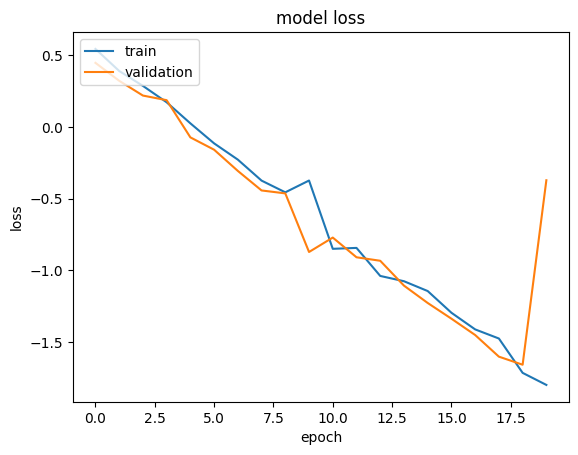

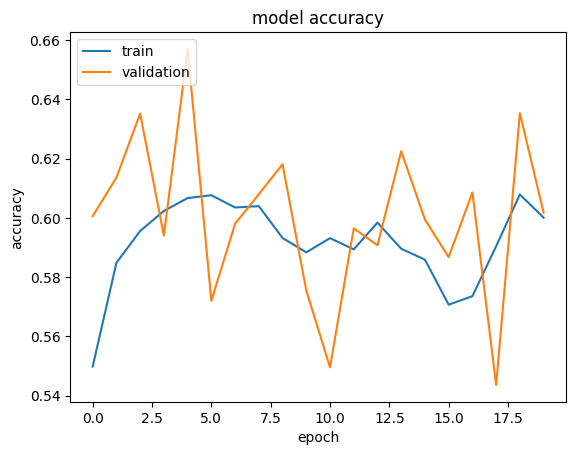

In [63]:
def plot_model(metric):
 plt.plot(history.history[metric])
 plt.plot(history.history[f"val_{metric}"])
 plt.title(f"model {metric}")
 plt.ylabel(f"{metric}")
 plt.xlabel("epoch")
 plt.legend(["train", "validation"], loc="upper left")
 plt.show()

plot_model("loss")
plot_model("accuracy")

In [ ]:
Sequential model --> validation = (), loss curve, accuracy curve